In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling  import RandomOverSampler
from sklearn.preprocessing import Normalizer

In [2]:
cols=('flength','fwidth','fsize','fconc','fconcl','fasym','fm3long','fm3Trans','falpha','fdist','class')
df=pd.read_csv('magic',names=cols)
df.head()

,flength,fwidth,fsize,fconc,fconcl,fasym,fm3long,fm3Trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df.isnull().sum()

flength     0
fwidth      0
fsize       0
fconc       0
fconcl      0
fasym       0
fm3long     0
fm3Trans    0
falpha      0
fdist       0
class       0
dtype: int64

In [4]:
print(df.shape)

(19020, 11)


In [5]:
print(df.dtypes)

flength     float64
fwidth      float64
fsize       float64
fconc       float64
fconcl      float64
fasym       float64
fm3long     float64
fm3Trans    float64
falpha      float64
fdist       float64
class        object
dtype: object


In [6]:
from sklearn.naive_bayes import GaussianNB as gb

In [7]:
df['class']=(df['class']=='g').astype(int) 

In [8]:
df

,flength,fwidth,fsize,fconc,fconcl,fasym,fm3long,fm3Trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [9]:
from pandas import set_option

In [10]:
print(df.describe())

            flength        fwidth         fsize         fconc        fconcl  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fasym       fm3long      fm3Trans        falpha         fdist  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      -4.331745     10.545545      0.249726     27.645707    193.818026   
std       59.206062     51.000118     20.827439    

In [11]:
count_class = df.groupby('class').size()
print(count_class)

class
0     6688
1    12332
dtype: int64


# Correlation

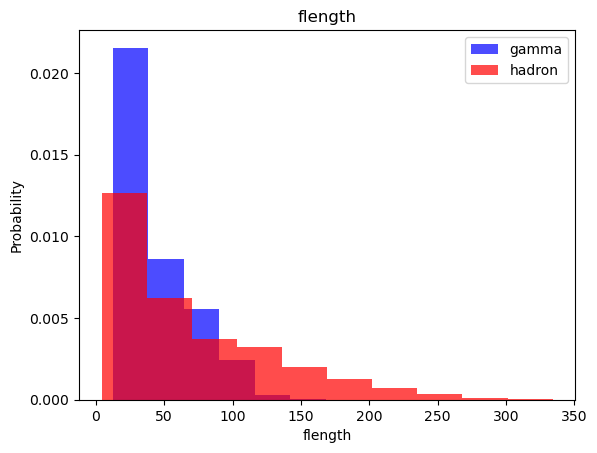

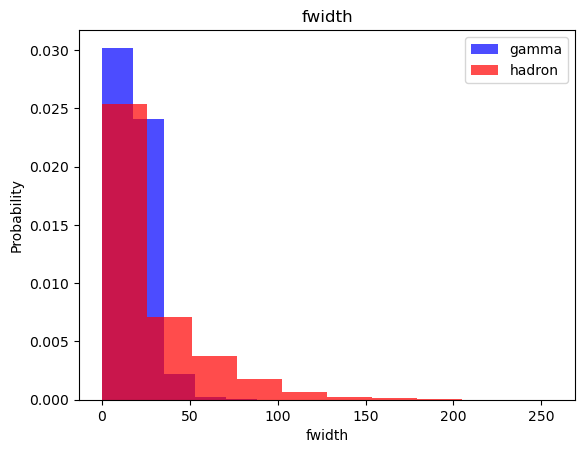

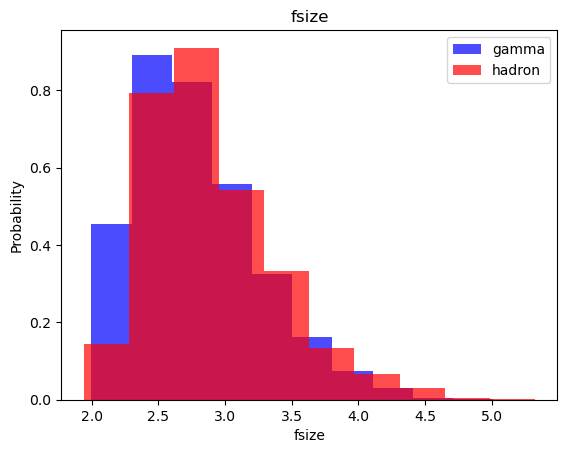

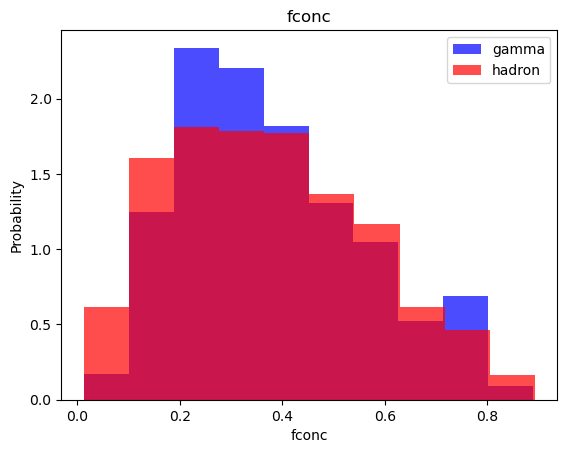

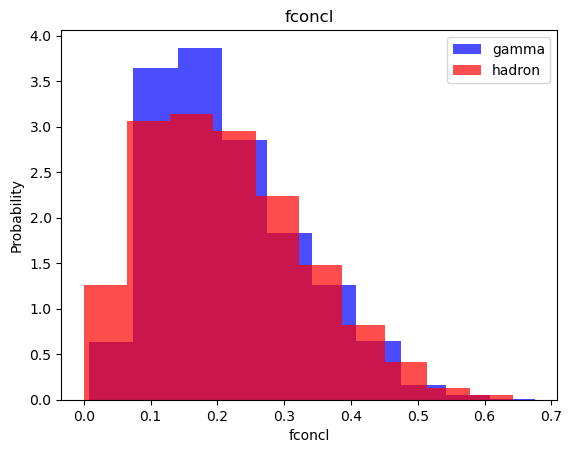

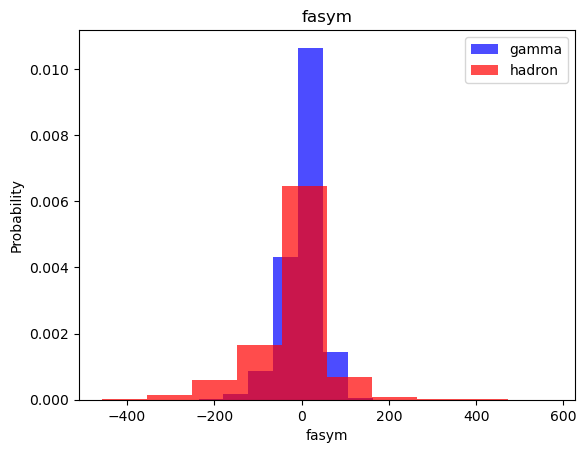

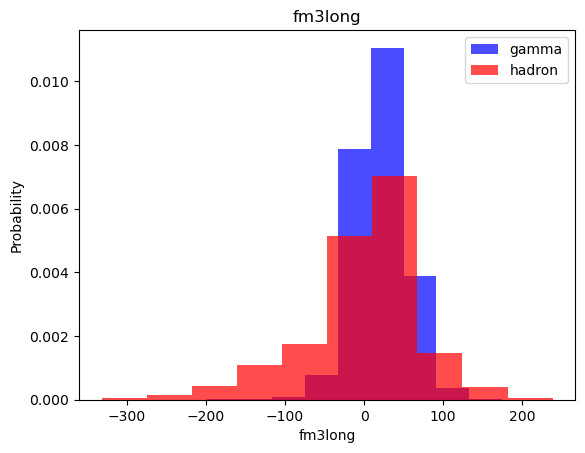

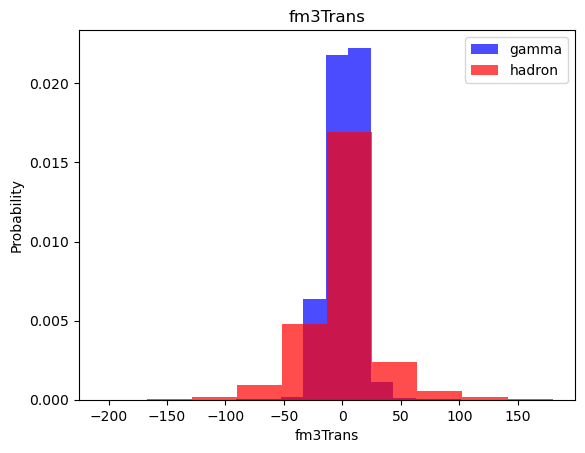

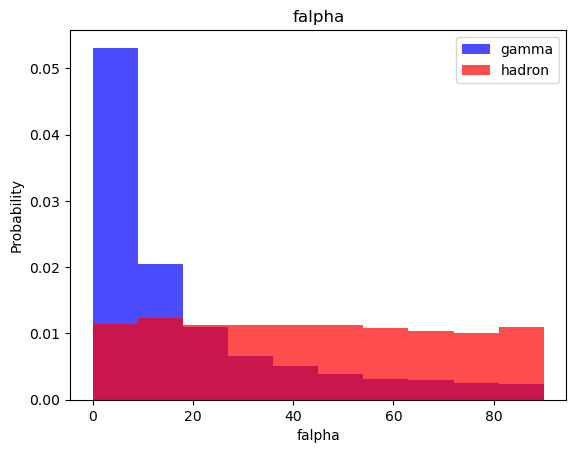

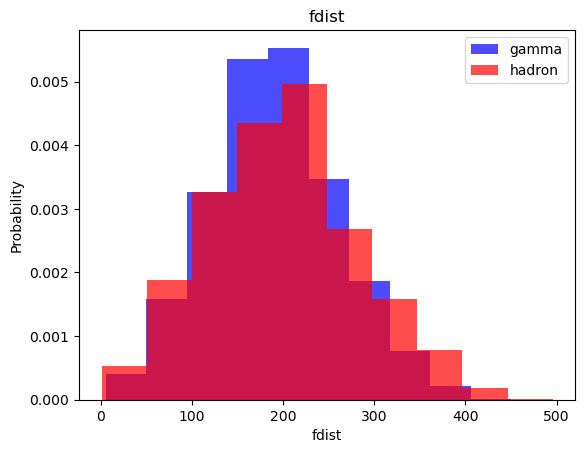

In [12]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel('Probability') 
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [13]:
correlations=df.corr(method='pearson')
print(correlations)

           flength    fwidth     fsize     fconc    fconcl     fasym  \
flength   1.000000  0.770512  0.702454 -0.630999 -0.598145 -0.368556   
fwidth    0.770512  1.000000  0.717517 -0.609779 -0.581141 -0.266961   
fsize     0.702454  0.717517  1.000000 -0.850850 -0.808835 -0.159863   
fconc    -0.630999 -0.609779 -0.850850  1.000000  0.976412  0.112272   
fconcl   -0.598145 -0.581141 -0.808835  0.976412  1.000000  0.100159   
fasym    -0.368556 -0.266961 -0.159863  0.112272  0.100159  1.000000   
fm3long  -0.119747 -0.176234  0.095157 -0.121899 -0.118769  0.274045   
fm3Trans  0.013389  0.039744  0.015455 -0.011294 -0.010966  0.002553   
falpha   -0.008777  0.066061 -0.186675  0.235272  0.229799 -0.055689   
fdist     0.418466  0.336816  0.437041 -0.328332 -0.304625 -0.206730   
class    -0.307572 -0.265596 -0.117795  0.024615  0.004797  0.173587   

           fm3long  fm3Trans    falpha     fdist     class  
flength  -0.119747  0.013389 -0.008777  0.418466 -0.307572  
fwidth   -0.1

In [14]:
print(df.skew())

flength     2.013652
fwidth      3.371628
fsize       0.875507
fconc       0.485888
fconcl      0.685695
fasym      -1.046441
fm3long    -1.123078
fm3Trans    0.120121
falpha      0.850890
fdist       0.229587
class      -0.621522
dtype: float64


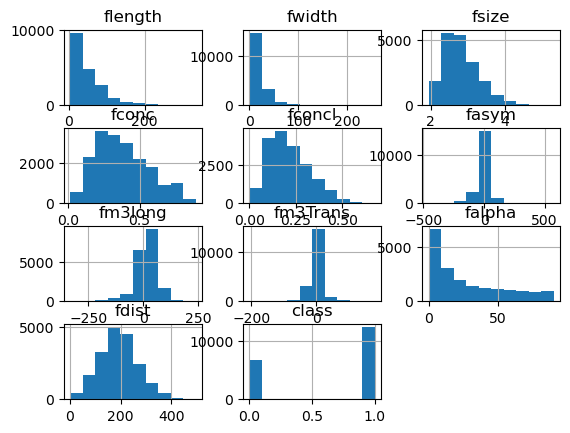

In [15]:
from matplotlib import pyplot as plt
df.hist()
plt.show()

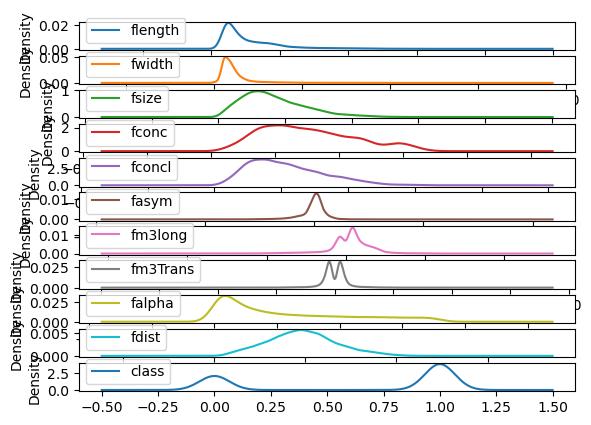

In [16]:
df.plot(kind='density', subplots=True, layout=(11,1), sharex=False)
plt.show()

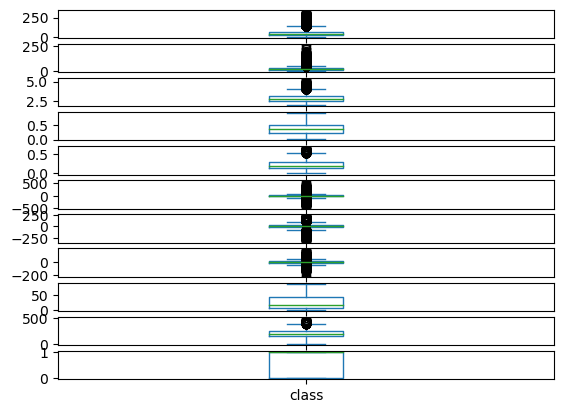

In [17]:
df.plot(kind='box', subplots=True, layout=(11,1), sharex=False,sharey=False)
plt.show()

# Train, Validation, Test Datasets

In [18]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [19]:
def scale_dataset(dataframe, oversample=False):
    x=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values
    
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    
    if oversample: 
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)
    data = np.hstack((x,np.reshape(y, [-1,1])))
                     
    return data, x, y

# Rescaling the data


In [20]:
#Helps us to convert strings
from numpy import set_printoptions
#Helps us in rescaling
from sklearn import preprocessing

In [21]:
df_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
rescaled_data= df_scaler.fit_transform(df)
rescaled_data

array([[0.0743064 , 0.06241507, 0.20804258, ..., 0.44546667, 0.1630664 ,
        1.        ],
       [0.08281491, 0.04572669, 0.17066824, ..., 0.07067667, 0.41267917,
        1.        ],
       [0.4782407 , 0.53057937, 0.62681845, ..., 0.85511111, 0.51692609,
        1.        ],
       ...,
       [0.21571204, 0.18538938, 0.44559432, ..., 0.33665222, 0.51637701,
        0.        ],
       [0.35232583, 0.29995007, 0.60691898, ..., 0.94097111, 0.82349138,
        0.        ],
       [0.55441499, 0.20672824, 0.37492608, ..., 0.5859    , 0.54834441,
        0.        ]])

# Working with precision

In [22]:
set_printoptions(precision=1)
print("\nScaled Data\n",rescaled_data[0:10])


Scaled Data
 [[0.1 0.1 0.2 0.4 0.3 0.5 0.6 0.5 0.4 0.2 1. ]
 [0.1 0.  0.2 0.6 0.6 0.5 0.6 0.5 0.1 0.4 1. ]
 [0.5 0.5 0.6 0.  0.  0.6 0.5 0.4 0.9 0.5 1. ]
 [0.1 0.  0.1 0.7 0.6 0.5 0.6 0.5 0.1 0.2 1. ]
 [0.2 0.1 0.4 0.3 0.3 0.4 0.6 0.6 0.1 0.7 1. ]
 [0.1 0.1 0.3 0.3 0.2 0.5 0.7 0.6 0.  0.5 1. ]
 [0.1 0.1 0.3 0.3 0.2 0.5 0.6 0.6 0.1 0.4 1. ]
 [0.1 0.1 0.2 0.5 0.3 0.5 0.6 0.5 0.  0.5 1. ]
 [0.3 0.2 0.7 0.1 0.1 0.6 0.7 0.6 0.1 0.5 1. ]
 [0.1 0.1 0.2 0.4 0.3 0.5 0.7 0.5 0.1 0.2 1. ]]


# Data Normalization

In [23]:
from sklearn.preprocessing import Normalizer

Data_normalizer = Normalizer(norm='l2').fit(df)
Normalized_data = Data_normalizer.transform(df)
Normalized_data

array([[0.3, 0.2, 0. , ..., 0.4, 0.8, 0. ],
       [0.1, 0.1, 0. , ..., 0. , 1. , 0. ],
       [0.4, 0.4, 0. , ..., 0.2, 0.7, 0. ],
       ...,
       [0.3, 0.2, 0. , ..., 0.1, 0.9, 0. ],
       [0.3, 0.2, 0. , ..., 0.2, 0.9, 0. ],
       [0.5, 0.1, 0. , ..., 0.1, 0.7, 0. ]])

In [24]:
print(len(train[train['class']==1])) #gamma
print(len(train[train['class']==0]))

7439
3973


In [25]:
train, x_train, y_train=scale_dataset(train, oversample=True)
valid, x_valid, y_valid=scale_dataset(valid, oversample=False)
test, x_test, y_test=scale_dataset(test, oversample=False)

In [26]:
len(y_train)

14878

In [27]:
sum(y_train==1)

7439

In [28]:
sum(y_train==0)

7439

KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [30]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
y_pred=knn_model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [32]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [33]:
len(y_pred)

3804

In [34]:
y_test

array([0, 1, 0, ..., 1, 1, 0])

In [35]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1388
           1       0.83      0.90      0.86      2416

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.80      3804
weighted avg       0.82      0.82      0.81      3804



# Binarizarion

In [36]:
array=df.values

In [37]:
from sklearn.preprocessing import Binarizer
Binarizer = Binarizer(threshold=0.5).fit(df)
Binarized_data=Binarizer.transform(df)
Binarized_data=binarizer.transforma(array)

NameError: name 'binarizer' is not defined

In [ ]:
import seaborn as sns


In [ ]:
pp.ProfileReport(df)

In [ ]:
duplicates=df[df.duplicated()]
duplicates

In [ ]:
df.nunique()

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
ProfileReport(df)

In [ ]:
total_time=stop_time-start_time
print('The total time taken to run the code is:',total_time)

In [ ]:
df.mode()

In [ ]:
dropped=df.drop(subset=['class'])
dropped

In [ ]:
print(df.iloc[15000])

# Data Rescaling

In [ ]:
from sklearn.preprocessing import StandardScaler
array=-df.values
array

In [ ]:
data_scaler=StandardScaler().fit(array)
rescaled_data=data_scaler.transform(array)
rescaled_data

In [ ]:
set_printoptions(precision=4)
print("\nRescaled Data:\n",rescaled_data[0:5])

# Label Encoding

In [ ]:
from sklearn import preprocessing
input_labels = ['red','black','red','green','black','yellow','white']
encoder=preprocessing.LabelEncoder()
encoder.fit(input_labels)

In [ ]:
test_labels=['green','red','black']
encoded_values=encoder.transform(test_labels)
print("\nLabels =", test_labels)
print("Encoded values =", list(encoded_values))
encoded_values = [3,0,4,1]
decoded_list = encoder.inverse_transform(encoded_values)
print("\nEncoded values =", encoded_values)
print("\nDecoded labels =", list(decoded_list))

# Machine Learning


Univariate Selection

In [ ]:
# importation of the necessary libraries:
from sklearn.feature_selection import chi2
# with the chi-squared library, i can be able to tell the variables with the best information for my prediction
# this reduces the overfitting
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
array=df.values
X = array[:,0:8]
Y = array[:,8]
print(X)

In [ ]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X,Y)

# Recursive Feature Elimination

In [ ]:
#The recursive feature elemination  helps us to eliminate the less important features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model=LogisticRegression() #gives us the relationship between input variables and binary outcomes
rfe=RFE(model, 3)
fit= rfe.fit(X,Y)

print("Number of Features: %d")
print("Selected Features: %s")
print("Feature Ranking: %s")